0
info_(8)(7)_0.txt
info_(8)(7)_1.txt
info_(8)(7)_2.txt
info_(8)(7)_3.txt
info_(8)(7)_4.txt
loss_train_(8)(7)_0.npy
loss_train_(8)(7)_1.npy
loss_train_(8)(7)_2.npy
loss_train_(8)(7)_3.npy
loss_train_(8)(7)_4.npy
loss_val(8)(7)_0.npy
loss_val(8)(7)_1.npy
loss_val(8)(7)_2.npy
loss_val(8)(7)_3.npy
loss_val(8)(7)_4.npy
weights(8)(7)_0.npy
weights(8)(7)_1.npy
weights(8)(7)_2.npy
weights(8)(7)_3.npy
weights(8)(7)_4.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


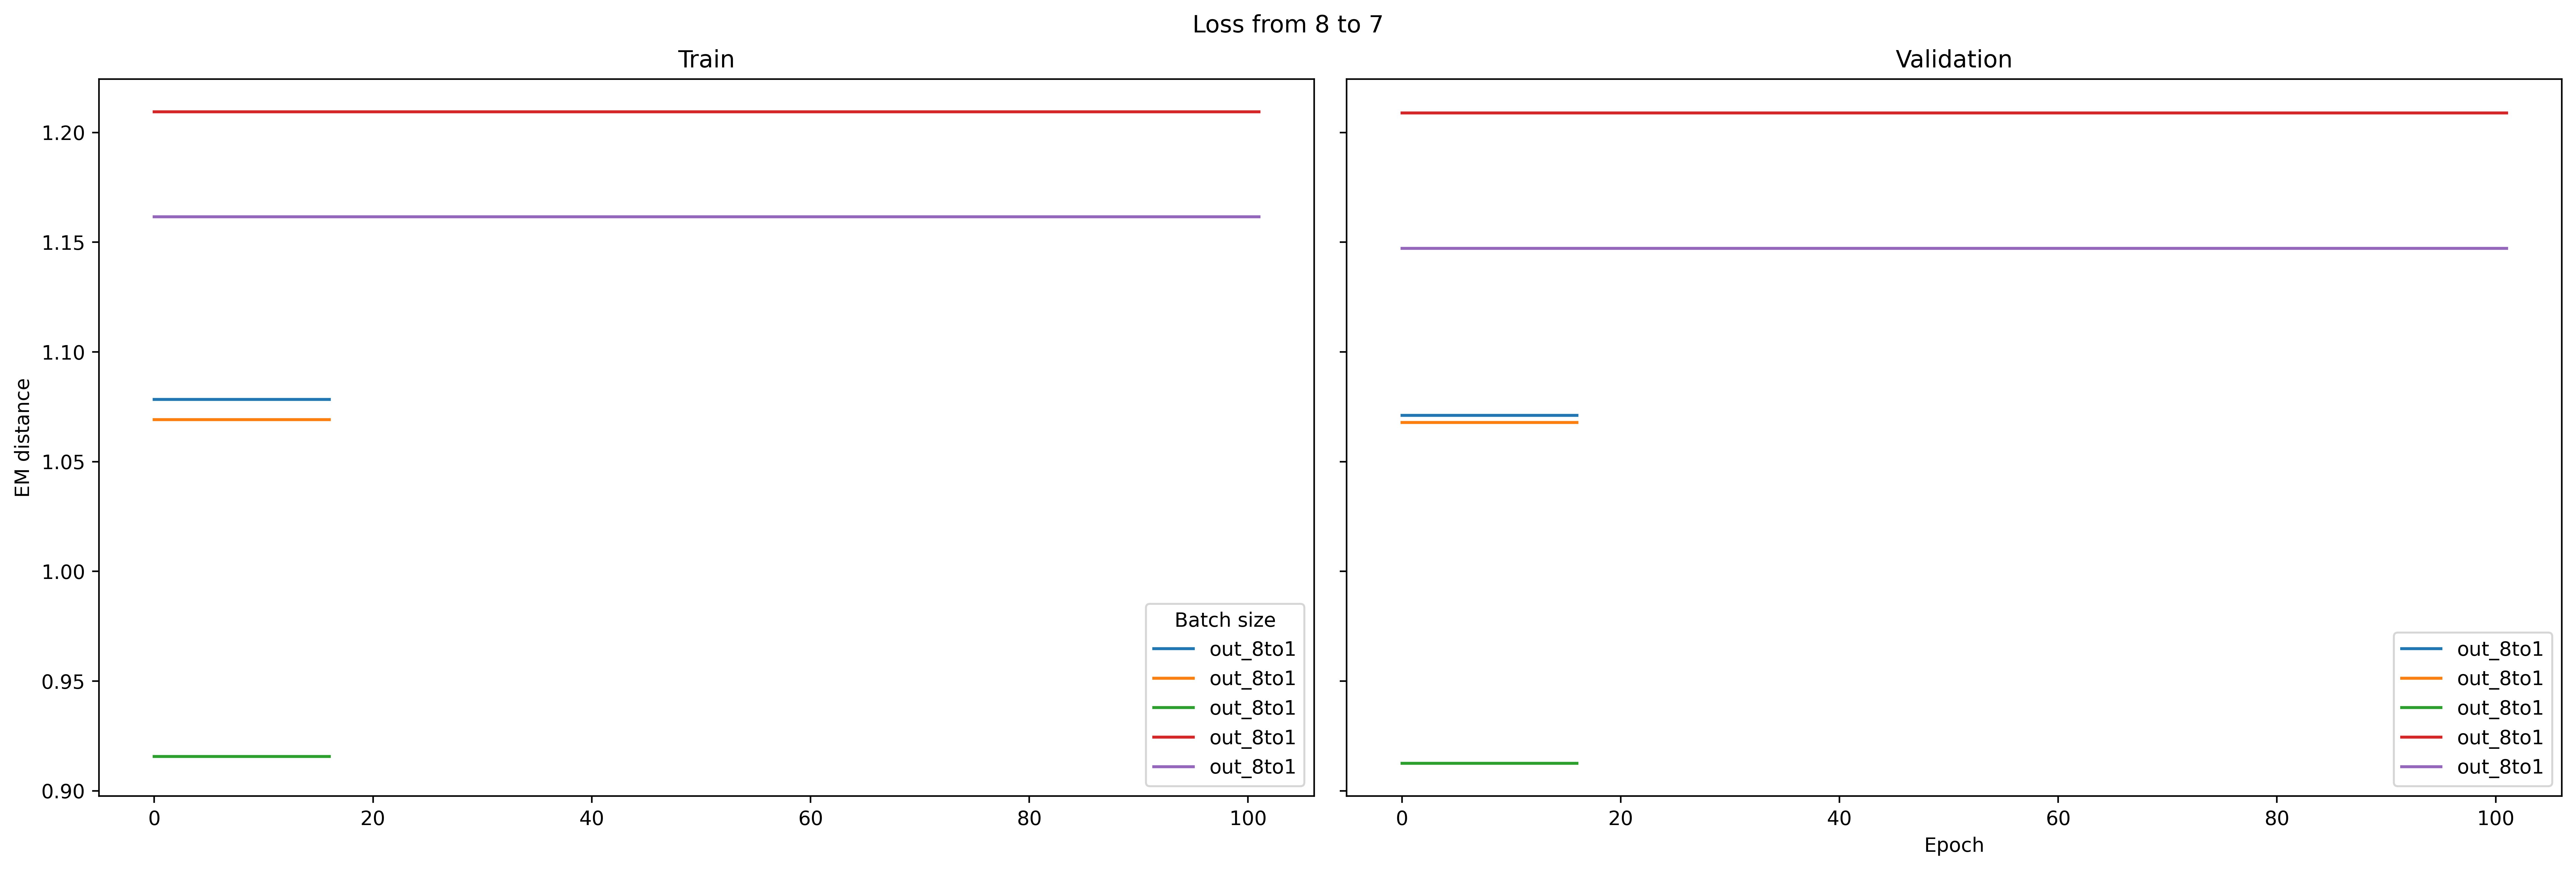

0
info_(8)(6)_0.txt
info_(8)(6)_1.txt
info_(8)(6)_2.txt
info_(8)(6)_3.txt
info_(8)(6)_4.txt
loss_train_(8)(6)_0.npy
loss_train_(8)(6)_1.npy
loss_train_(8)(6)_2.npy
loss_train_(8)(6)_3.npy
loss_train_(8)(6)_4.npy
loss_val(8)(6)_0.npy
loss_val(8)(6)_1.npy
loss_val(8)(6)_2.npy
loss_val(8)(6)_3.npy
loss_val(8)(6)_4.npy
weights(8)(6)_0.npy
weights(8)(6)_1.npy
weights(8)(6)_2.npy
weights(8)(6)_3.npy
weights(8)(6)_4.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

In [15]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Define the main folder
main_folder = 'out'
# Initialize data storage
columns = ["Train", "Validation"]  # Titles for each column
plot_data = {}
i =1



train_data_all = {} 
val_data_all = {}

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    print(0)
    for batchfolder in os.listdir(subfolder_path):
        batchfolder_path = os.path.join(subfolder_path, batchfolder)
        for file in os.listdir(batchfolder_path):
            print(file)
            file_path= os.path.join(batchfolder_path, file)
            if 'loss_train' in file:
                mq_ver=file[15]
                mq = mq_ver
                append=file[11:]
                train_file = os.path.join(batchfolder_path, file)
                val_file = os.path.join(batchfolder_path, f'loss_val{append}')
                #load losses
                train_data = np.load(train_file)
                val_data = np.load(val_file)
                
                # Collect data
                train_data_all[(mq,subfolder,append[-5])]=(train_data)
                val_data_all[(mq,subfolder,append[-5])]=(val_data)
    if train_data_all:

        fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(18,6),sharey=True,dpi=500)
        fig.suptitle(f'Loss from 8 to {mq}')
        axs[0].set_ylabel("EM distance")

        for k,tr in train_data_all.items():
            x=range(min(len(tr),250))
            sns.lineplot(x=x,y=tr[:min(len(tr),250)], ax=axs[0],label=k[1]);
            axs[0].set_title('Train')
            l=axs[0].legend()
            l.set_title('Batch size')
        for k,vr in val_data_all.items():
            x=range(min(len(vr),250))
            l=axs[1].legend()
            l.set_title('Batch size')
            sns.lineplot(x=x,y=vr[:min(len(vr),250)], ax=axs[1],label=k[1]);
            axs[1].set_title('Validation')
            plt.xlabel("Epoch")

        plt.show()

